In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1.   *Прочитайте csv файл (використовуйте функцію read_csv)
2.   *Виведіть перші п'ять рядків (використовується функція head)
3.   *Виведіть розміри датасету (використовуйте атрибут shape)

In [2]:
path = "/content/bestsellers with categories.csv"
df = pd.read_csv(path)

In [5]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

Відповідь: Про скільки книг зберігає дані датасет?

**550**

In [6]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [8]:
for column in df.columns:
    missing_percentage = df[column].isnull().sum() / df.shape[0]
    if missing_percentage:
      print(f"Колонка '{column}': {missing_percentage:.1%}")

Відповідь: Чи є в якихось змінних пропуски? (Так / ні)

**Ні**

In [9]:
unique_genres = df['genre'].unique()
print(unique_genres)


['Non Fiction' 'Fiction']


Відповідь: Які є унікальні жанри?


**'Non Fiction' 'Fiction'**

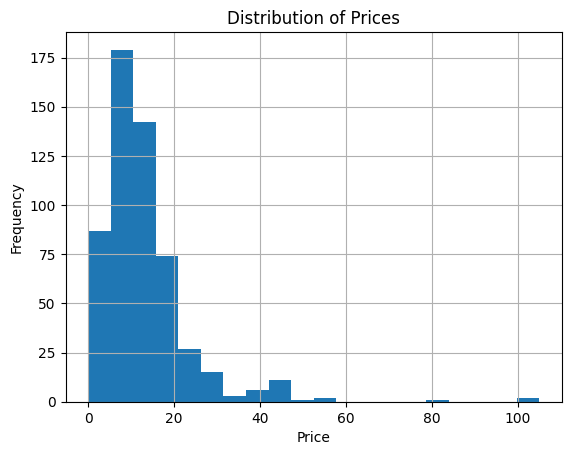

In [10]:
df['price'].hist(bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()


In [12]:
print("Максимальна ціна:", df['price'].max())
print("Мінімальна ціна:", df['price'].min())
print("Середня ціна:", df['price'].mean())
print("Медіанна ціна:", df['price'].median())


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


Відповідь: Максимальна ціна?
Відповідь: Мінімальна ціна?
Відповідь: Середня ціна?
Відповідь: Медіанна ціна?

**Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0**

In [14]:
max_rating = df['user_rating'].max()
max_rating

4.9

Який рейтинг у датасеті найвищий? 

**Відповідь: 4.9**

In [15]:
num_books_max_rating = len(df[df['user_rating'] == max_rating])
print(num_books_max_rating)

52


Скільки книг мають такий рейтинг?

**52**

In [17]:
book_with_max_reviews = df.loc[df["reviews"].idxmax()]["name"]
print(book_with_max_reviews)


Where the Crawdads Sing


Яка книга має найбільше відгуків?

**Where the Crawdads Sing**

In [19]:
top_books_2015 = df[(df['year'] == 2015) & (df['user_rating'] >= 4.5)].sort_values(by='user_rating', ascending=False).head(50)
most_expensive_book = top_books_2015[top_books_2015['price'] == top_books_2015['price'].max()]
print(most_expensive_book[['name', 'price']])


                                                  name  price
277  Publication Manual of the American Psychologic...     46


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча

**Publication Manual of the American Psychologic...     46**

In [20]:
num_fiction_books_2010 = len(df[(df['genre'] == 'Fiction') & (df['year'] == 2010)])
print(num_fiction_books_2010)


20


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

**20**

In [22]:
filtered_df = df[(df['year'].isin([2010, 2011])) & (df['user_rating'] == 4.9)]
num_books = len(filtered_df)
print(num_books)


1


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

**1**

In [23]:
top_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_book = top_2015_under_8.iloc[-1]['name']
print(last_book)


Old School (Diary of a Wimpy Kid #10)


Яка книга остання у відсортованому списку? 

**Old School (Diary of a Wimpy Kid #10)**

In [24]:
df.groupby('genre').agg({'price': ['max', 'min']})


price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

Відповідь: Максимальна ціна для жанру Fiction: **82**

Відповідь: Мінімальна ціна для жанру Fiction: **0**

Відповідь: Максимальна ціна для жанру Non Fiction: **105**

Відповідь: Мінімальна ціна для жанру Non Fiction: **0**

In [48]:
book_count = df.groupby('author')['name'].count().reset_index()
book_count.columns = ['author', 'book_count']
book_count



,author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


Розмірність таблиці: (248, 1)

Автор з найбільшою кількістю книг: Jeff Kinney

Кількість книг автора: 12 

In [51]:
author_rating_df = df[['author', 'user_rating']].groupby('author').agg('mean').reset_index()
min_rating_author = author_rating_df.sort_values('user_rating').iloc[0]['author']
min_rating = author_rating_df.sort_values('user_rating').iloc[0]['user_rating']
print (f'{min_rating_author} {min_rating}')

Donna Tartt 3.9


У якого автора середній рейтинг мінімальний? **Відповідь: Donna Tartt**


Який у цього автора середній рейтинг? Відповідь: **3.90**

In [63]:
rates_books = pd.concat([book_count, author_rating_df], axis=1)
rates_books.sort_values(by='book_count')

,author,book_count,author,user_rating
123,Jill Twiss,1,Jill Twiss,4.900000
178,Patrick Thorpe,1,Patrick Thorpe,4.900000
109,Ian K. Smith M.D.,1,Ian K. Smith M.D.,4.100000
108,Howard Stern,1,Howard Stern,4.300000
107,Hopscotch Girls,1,Hopscotch Girls,4.800000
...,...,...,...,...
11,American Psychological Association,10,American Psychological Association,4.500000
226,Suzanne Collins,11,Suzanne Collins,4.663636
92,Gary Chapman,11,Gary Chapman,4.736364
197,Rick Riordan,11,Rick Riordan,4.772727


Який автор перший у списку?

**Jill Twiss	**

--------------------------------------------------


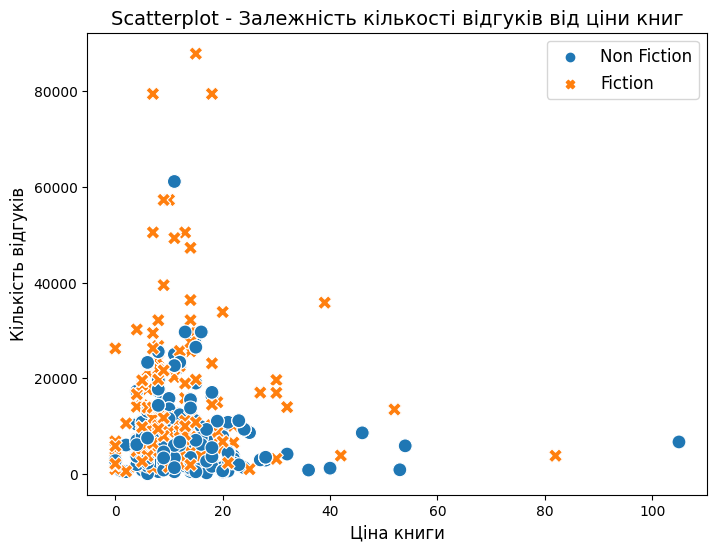

In [65]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='price', y='reviews', hue='genre', style='genre', s=100)
plt.title('Scatterplot - Залежність кількості відгуків від ціни книг', fontsize=14)
plt.xlabel('Ціна книги', fontsize=12)
plt.ylabel('Кількість відгуків', fontsize=12)
plt.legend(fontsize=12)
plt.show()


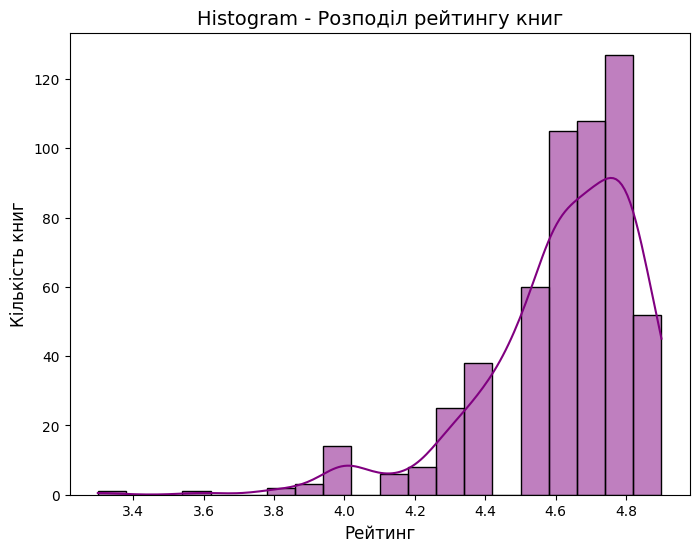

In [66]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='user_rating', bins=20, kde=True, color='purple')
plt.title('Histogram - Розподіл рейтингу книг', fontsize=14)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Кількість книг', fontsize=12)
plt.show()


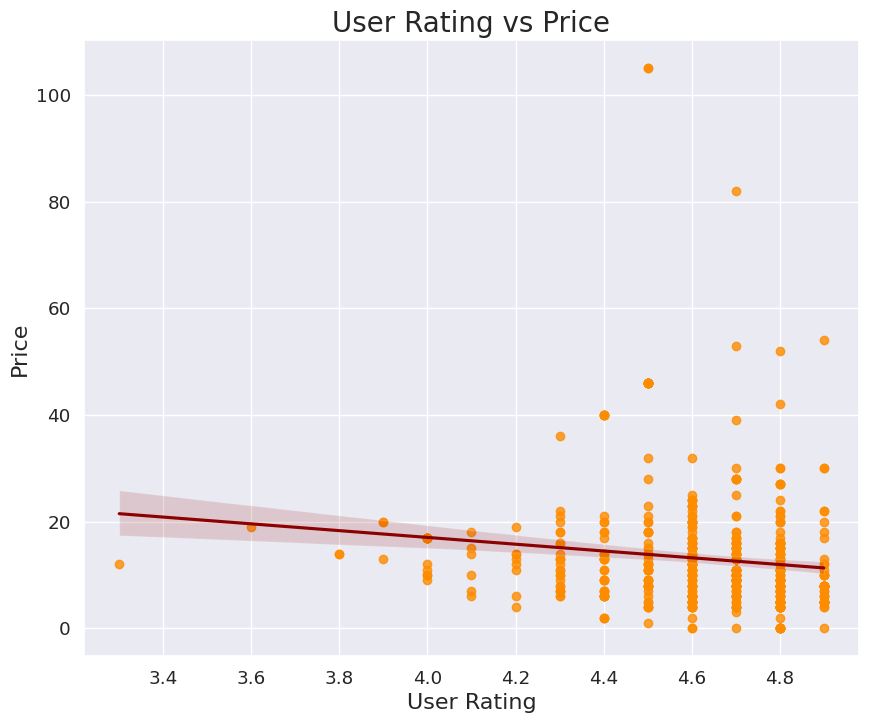

In [70]:
sns.set(style='darkgrid', font_scale=1.2)

fig, ax = plt.subplots(figsize=(10, 8))

sns.regplot(data=df, x='user_rating', y='price', color='darkorange', line_kws={'color': 'darkred'})

ax.set_title('User Rating vs Price', fontsize=20)
ax.set_xlabel('User Rating', fontsize=16)
ax.set_ylabel('Price', fontsize=16)

plt.show()